In [ ]:
import pandas as pd
import cfbd

# Configure and connect to the API
configuration = cfbd.Configuration()
configuration.api_key['Authorization'] = 'JzklTqOxcM8ySh0F9KojHKqTn8CLhFHS84R6aZGp+eY8NyrGLkDSFgU'  # Replace with your actual API keyaePvOfmrT
configuration.api_key_prefix['Authorization'] = 'Bearer'
api_instance = cfbd.GamesApi(cfbd.ApiClient(configuration))

# Get the games data
games = api_instance.get_games(year=2020)

# Convert the JSON-like structure into a DataFrame
games_data = [game.to_dict() for game in games]  # Converts each game object to a dictionary
df = pd.DataFrame(games_data)

# Display the DataFrame
df.head()



,id,season,week,season_type,start_date,start_time_tbd,completed,neutral_site,conference_game,attendance,...,away_conference,away_division,away_points,away_line_scores,away_post_win_prob,away_pregame_elo,away_postgame_elo,excitement_index,highlights,notes
0,401218616,2020,1,regular,2020-08-30T01:00:00.000Z,False,True,True,False,NaN,...,OVC,fcs,17,"[7, 3, 0, 7]",NaN,NaN,NaN,NaN,None,None
1,401238035,2020,1,regular,2020-09-04T00:00:00.000Z,False,True,False,False,12716.0,...,Southland,fcs,35,"[7, 14, 0, 14]",0.001919,NaN,NaN,2.226002,https://www.youtube.com/watch?v=aBwb65AoLmQ,None
2,401207101,2020,1,regular,2020-09-04T01:00:00.000Z,False,True,False,False,NaN,...,Sun Belt,fbs,32,"[13, 0, 10, 9]",0.730261,1227.0,1272.0,5.586950,https://www.youtube.com/watch?v=XzIoo20mNEo,None
3,401237353,2020,1,regular,2020-09-05T17:00:00.000Z,False,True,False,False,12001.0,...,OVC,fcs,0,"[0, 0, 0, 0]",0.001064,NaN,NaN,1.145603,https://www.youtube.com/watch?v=TBf5sm0SvaE,None
4,401235700,2020,1,regular,2020-09-05T17:30:00.000Z,False,True,False,False,5249.0,...,Conference USA,fbs,0,"[0, 0, 0, 0]",0.001060,1429.0,1314.0,2.470913,https://www.youtube.com/watch?v=FdOHH54jzW4,None


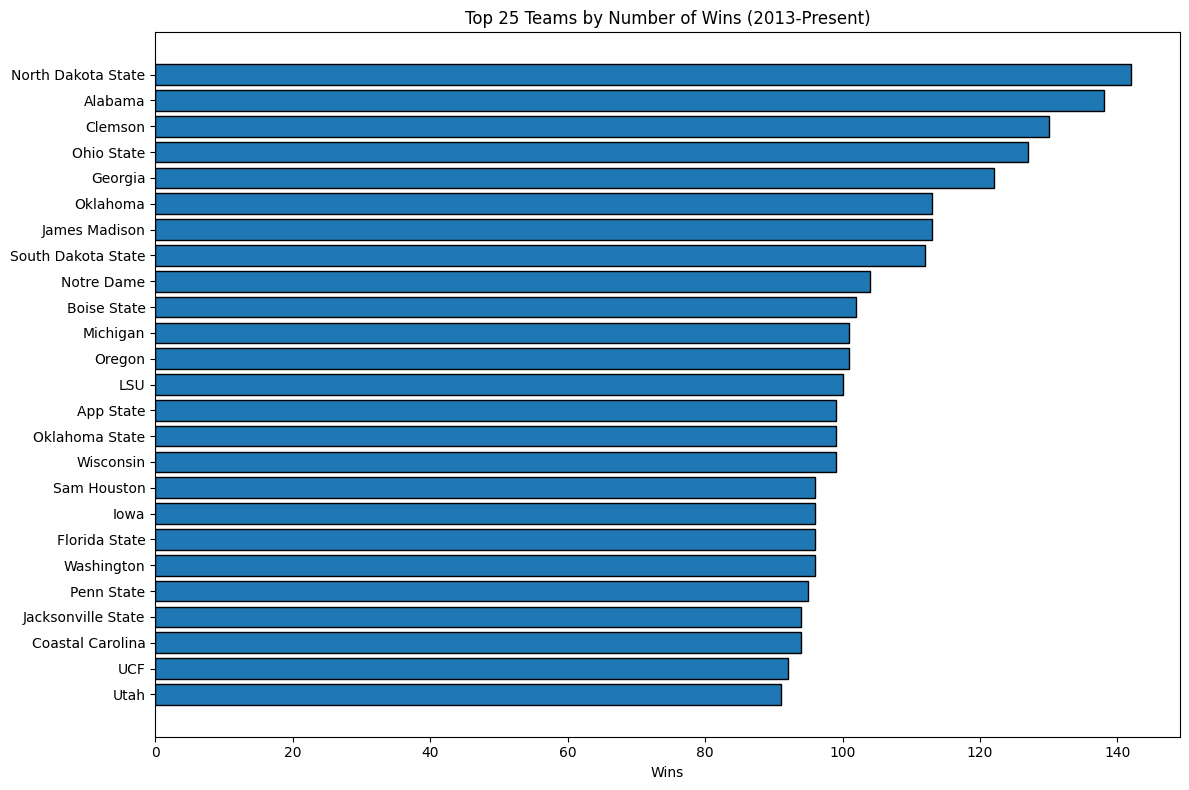

In [50]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Set up your API key and base URL
api_key = "JzklTqOxcM8ySh0F9KojHKqTn8CLhaePvOfmrTFHS84R6aZGp+eY8NyrGLkDSFgU"  # Replace with your actual API key
base_url = "https://api.collegefootballdata.com/records"
headers = {
    "Authorization": f"Bearer {api_key}"
}

# Loop through each year from 2013 to the current year
team_records = []
for year in range(2013, 2024):  # Adjust the end year as needed
    params = {"year": year}
    response = requests.get(base_url, headers=headers, params=params)
    
    # Check if request was successful
    if response.status_code == 200:
        data = response.json()
        
        # Process data for each team
        for team in data:
            team_name = team.get("team")
            wins = team.get("total", {}).get("wins", 0)
            team_records.append({"Team": team_name, "Wins": wins})
    else:
        print(f"Error fetching data for year {year}: {response.status_code}")
        print(response.text)

# Convert to DataFrame and aggregate wins by team
df = pd.DataFrame(team_records)
df = df.groupby("Team").sum().reset_index()
df = df.sort_values(by="Wins", ascending=False).head(25)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(df['Team'], df['Wins'], edgecolor='black')
plt.gca().invert_yaxis()  # Invert for top-down ranking
plt.xlabel('Wins')
plt.title('Top 25 Teams by Number of Wins (2013-Present)')
plt.tight_layout()
plt.show()


In [1]:
import requests
import pandas as pd
from datetime import datetime

# Initialize your API key and base URL
api_key = "JzklTqOxcM8ySh0F9KojHKqTn8CLhaePvOfmrTFHS84R6aZGp+eY8NyrGLkDSFgU"  # Replace with your actual API key
headers = {
    "Authorization": f"Bearer {api_key}"
}

# Define function to pull game data for each season
def get_game_data(year):
    url = f"https://api.collegefootballdata.com/games?year={year}&seasonType=both"
    response = requests.get(url, headers=headers)
    
    # Check if the request was successful
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching data for year {year}: {response.status_code}")
        return []

# Collect data from 2013 to the current year
current_year = datetime.now().year
all_games_data = []

for year in range(2013, current_year + 1):
    yearly_data = get_game_data(year)
    all_games_data.extend(yearly_data)  # Append all games data to list

# Convert data to a DataFrame
games_df = pd.DataFrame(all_games_data)

# Quick inspection of the data structure
#games_df.head(20)

# Display all column headers in the DataFrame
print(games_df.columns)



Index(['id', 'season', 'week', 'season_type', 'start_date', 'start_time_tbd',
       'completed', 'neutral_site', 'conference_game', 'attendance',
       'venue_id', 'venue', 'home_id', 'home_team', 'home_conference',
       'home_division', 'home_points', 'home_line_scores',
       'home_post_win_prob', 'home_pregame_elo', 'home_postgame_elo',
       'away_id', 'away_team', 'away_conference', 'away_division',
       'away_points', 'away_line_scores', 'away_post_win_prob',
       'away_pregame_elo', 'away_postgame_elo', 'excitement_index',
       'highlights', 'notes'],
      dtype='object')
